In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [4]:
#Read the data
data = pd.read_csv("Advertising.csv")

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.drop(["Unnamed: 0"],axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Simple Linear Regression
Modelling


# Make scatter plot

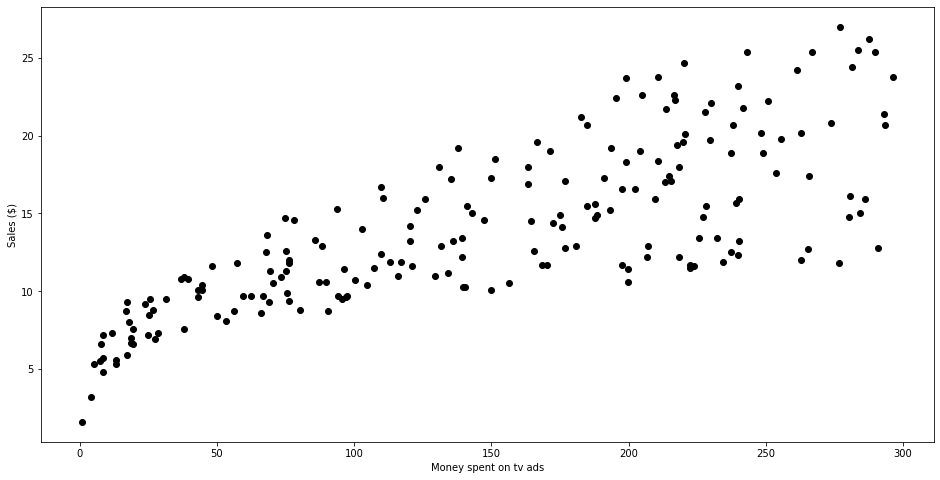

In [9]:
plt.figure(figsize=(16,8))
plt.scatter(
data['TV'],
data['sales'],c='black')
plt.xlabel("Money spent on tv ads")
plt.ylabel("Sales ($)")
plt.show()

# Let’s see how we can generate a linear approximation of this data.

In [12]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 7.0326 + 0.047537X


# Let’s visualize how the line fits the data.

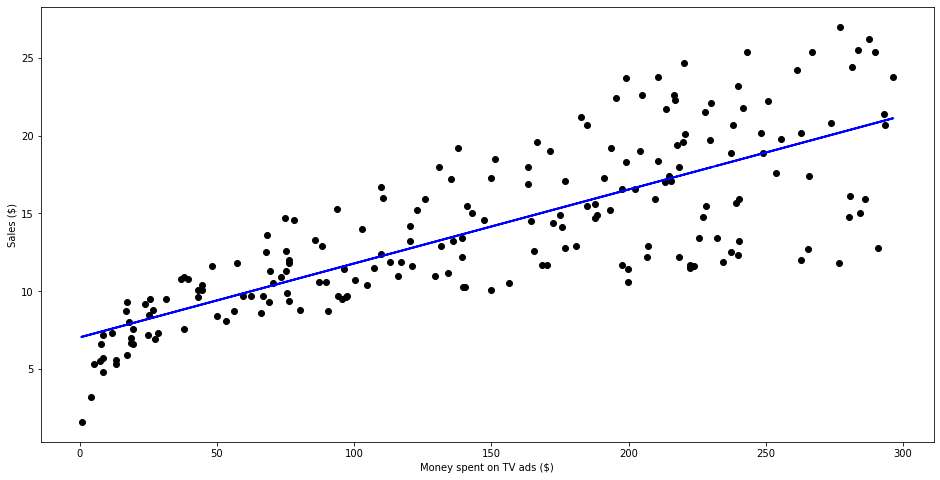

In [14]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

 it seems that a simple linear regression can explain the general impact of amount spent on TV ads and sales.

# Assessing the relevancy of the model

if the model is any good, we need to look at the R² value and the p-value from each coefficient.

In [16]:
X = data['TV']
y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        13:52:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0